In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastai.vision import *
from fastai.vision.data import ImageDataBunch, get_transforms
from fastai.metrics import error_rate, accuracy
from pathlib import Path
import os

In [2]:
path = Path(os.getcwd())/"data"/"ants_and_bees"
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, train="train", valid="val", ds_tfms=tfms, size=224, bs=20) # from_folder labels data based on the folder name
#same as pytorch : only applies transform to training loader. Training loader is set with shuffle true while val loader is not

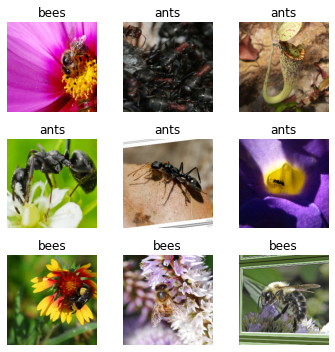

In [3]:
data.show_batch(rows=3, figsize=(5,5), ds_type=DatasetType.Train)

In [4]:
data.classes, data.c

(['ants', 'bees'], 2)

In [5]:
len(data.train_ds), len(data.valid_ds), 

(245, 153)

In [10]:
# torch.cuda.empty_cache()

In [6]:
learn = cnn_learner(data, models.vgg16_bn, metrics=accuracy)
learn.summary()

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to C:\Users\Gabriel/.cache\torch\checkpoints\vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:23<00:00, 23.9MB/s]


Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 224, 224]       1,792      False     
______________________________________________________________________
BatchNorm2d          [64, 224, 224]       128        True      
______________________________________________________________________
ReLU                 [64, 224, 224]       0          False     
______________________________________________________________________
Conv2d               [64, 224, 224]       36,928     False     
______________________________________________________________________
BatchNorm2d          [64, 224, 224]       128        True      
______________________________________________________________________
ReLU                 [64, 224, 224]       0          False     
______________________________________________________________________
MaxPool2d            [64, 112, 112]       0          False     
___________________________________________________

In [7]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


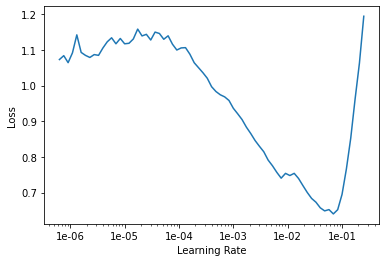

In [9]:
learn.recorder.plot() 

In [13]:
lr = 1e-3
learn.fit_one_cycle(10, slice(lr), pct_start=0.7)
# it is not the same to run fit one cycle more than once : https://forums.fast.ai/t/running-fit-one-cycle-more-than-once/48037

epoch,train_loss,valid_loss,accuracy,time
0,1.049637,0.599422,0.712418,00:49
1,0.833369,0.375974,0.836601,00:44
2,0.632448,0.222162,0.915033,00:45
3,0.518093,0.188519,0.921569,00:44
4,0.462868,0.206315,0.934641,00:45
5,0.388335,0.209183,0.954248,00:44
6,0.315197,0.192385,0.941176,00:43
7,0.281225,0.227855,0.941176,00:44
8,0.236837,0.273191,0.941176,00:44
9,0.211384,0.264948,0.941176,00:44


In [30]:
learn.save("test_mod")

In [43]:
learn.load("test_mod")

Learner(data=ImageDataBunch;

Train: LabelList (245 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
ants,ants,ants,ants,ants
Path: c:\Users\Gabriel\Documents\workprojects\pytorch\data\ants_and_bees;

Valid: LabelList (153 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
ants,ants,ants,ants,ants
Path: c:\Users\Gabriel\Documents\workprojects\pytorch\data\ants_and_bees;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inp

In [29]:
len(learn.recorder.lrs) # 120 iterations total

120

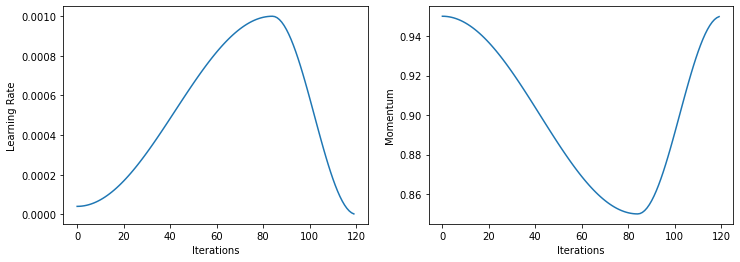

In [18]:
learn.recorder.plot_lr(show_moms=True) # to do the same in pytorch, i would have to modify lr and momentum for each parameters at each iteration

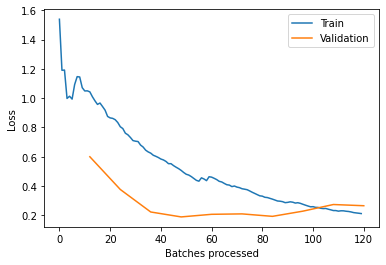

In [15]:
learn.recorder.plot_losses()

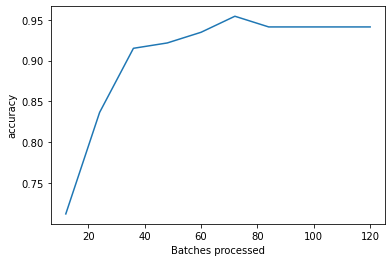

In [16]:
learn.recorder.plot_metrics()